In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import pickle

In [87]:
# Carregando os dados
train_data = pd.read_csv('C:/Users/sidne/Desktop/Python/Projetos - Machine Learning/Train_Data.csv')
# Verificando os 05 primeiros dados
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [88]:
# Dimensão dos dados
train_data.shape

(3630, 7)

In [89]:
# Chegando vazios nos dados
train_data.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [90]:
# informação dos dados
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [91]:
# Dimensões dos dados - Numerico
train_data.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [92]:
# Dimensões dos dados - Categorico
train_data.describe(include=['O'])

,sex,smoker,region
count,3630,3630,3630
unique,2,2,4
top,male,no,southeast
freq,2029,3070,1021


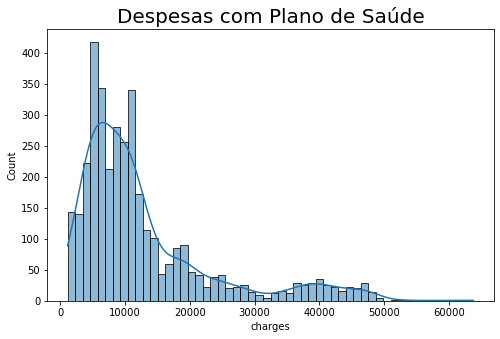

In [93]:
# Histograma 
plt.figure(figsize=(8,5))
sns.histplot(train_data['charges'], kde= True)
plt.title('Despesas com Plano de Saúde', fontsize = 20)
plt.show()

C:\Users\sidne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


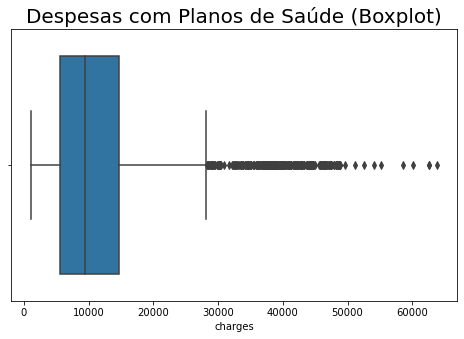

In [94]:
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(train_data['charges'])
plt.title('Despesas com Planos de Saúde (Boxplot)', fontsize = 20)
plt.show()

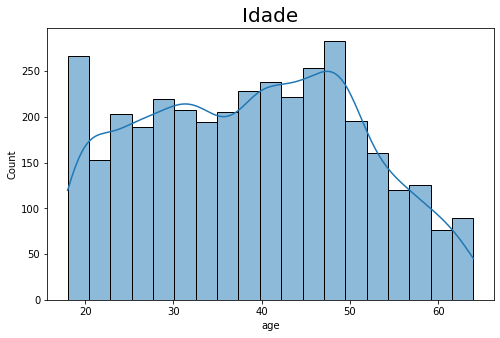

In [95]:
# Histograma de Idade
plt.figure(figsize=(8,5))
sns.histplot(train_data['age'], kde= True)
plt.title('Idade', fontsize = 20)
plt.show()

C:\Users\sidne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


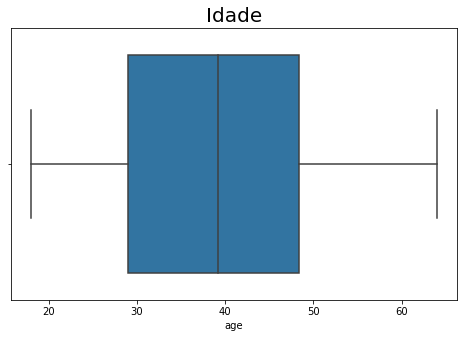

In [96]:
# Boxplot de Idade
plt.figure(figsize=(8,5))
sns.boxplot(train_data['age'])
plt.title('Idade', fontsize = 20)
plt.show()

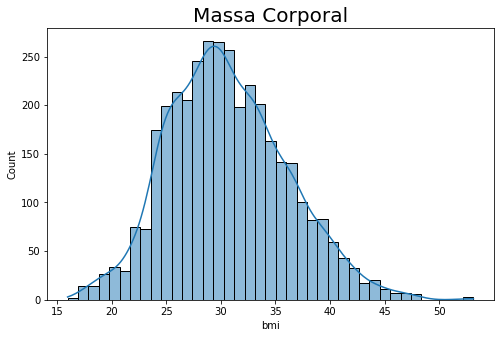

In [97]:
# Histograma Massa Corporal
plt.figure(figsize = (8,5))
sns.histplot(train_data['bmi'], kde=True)
plt.title('Massa Corporal', fontsize = 20)
plt.show()

C:\Users\sidne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


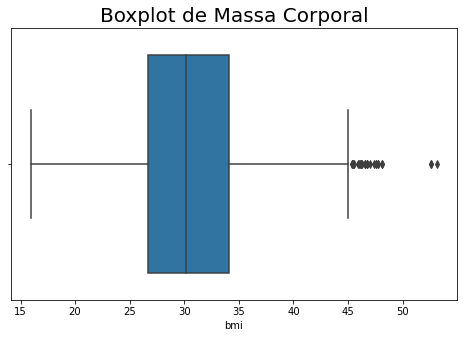

In [98]:
# Boxplot Massa Corporal
plt.figure(figsize= (8,5))
sns.boxplot(train_data['bmi'])
plt.title('Boxplot de Massa Corporal', fontsize = 20)
plt.show()


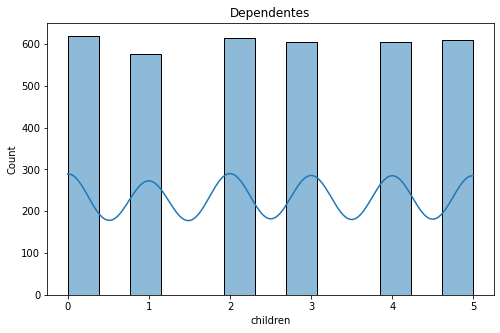

In [99]:
# Histograma - Dependentes
plt.figure(figsize = (8,5))
sns.histplot(train_data['children'], kde = True)    
plt.title('Dependentes')
plt.show()

C:\Users\sidne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


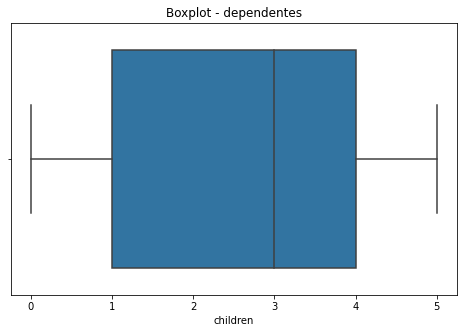

In [100]:
# Boxplot de dependentes
plt.figure(figsize= (8,5))
sns.boxplot(train_data['children'])
plt.title('Boxplot - dependentes')
plt.show()

Masculino:  2029
Feminino:  1601


C:\Users\sidne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


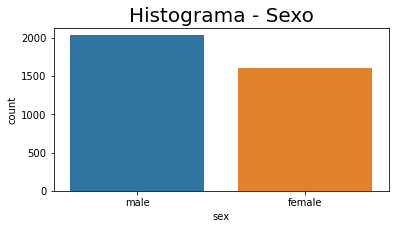

In [101]:
# Histograms - Sexo

# Contagem
print('Masculino: ', train_data['sex'].value_counts()[0])
print('Feminino: ', train_data['sex'].value_counts()[1])
#Visualização
plt.figure(figsize= (6,3))
sns.countplot(train_data['sex'])
plt.title('Histograma - Sexo', fontsize = 20)
plt.show()

Fumantes:  3070
Não Fumante:  560


C:\Users\sidne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


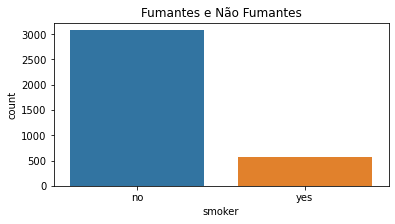

In [102]:
# Fumantes 

# Contagem 
print('Fumantes: ', train_data['smoker'].value_counts()[0])
print('Não Fumante: ', train_data['smoker'].value_counts()[1])
# Visualização
plt.figure(figsize = (6,3))
sns.countplot(train_data['smoker'])
plt.title('Fumantes e Não Fumantes')
plt.show()


South-East:  1021
North-West:  911
South-West:  850
North-East:  848


C:\Users\sidne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


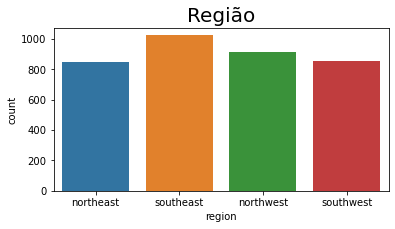

In [103]:
# Região

# Contagem
print('South-East: ', train_data['region'].value_counts()[0])
print('North-West: ', train_data['region'].value_counts()[1])
print('South-West: ', train_data['region'].value_counts()[2])
print('North-East: ', train_data['region'].value_counts()[3])

# Visualização
plt.figure(figsize=(6,3))
sns.countplot(train_data['region'])
plt.title('Região', fontsize = 20)
plt.show()

In [104]:
# Pré-Processamento dos dados
train_data['age'] = round(train_data['age'])

In [105]:
# Transformando Variáveis em númericos
train_data = pd.get_dummies(train_data, drop_first=True)

In [106]:
train_data.head(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.0,25.745000,2,3279.868550,1,0,0,0,0
1,37.0,25.744165,3,21454.494239,0,1,0,1,0
2,18.0,30.030000,1,1720.353700,1,0,0,1,0
3,37.0,30.676891,3,6801.437542,1,0,0,0,0
4,58.0,32.010000,1,11946.625900,1,0,0,1,0


In [107]:
train_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [108]:
# Reorganizar colunas
train_data = train_data[['age', 'sex_male', 'smoker_yes', 'bmi', 'children','region_northwest', 'region_southwest', 'region_southeast', 'charges']]
train_data.head(2)


,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southwest,region_southeast,charges
0,21.0,1,0,25.745000,2,0,0,0,3279.868550
1,37.0,0,1,25.744165,3,0,0,1,21454.494239


In [109]:
# Separando labels e features
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

In [110]:
X.head(2)

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southwest,region_southeast
0,21.0,1,0,25.745000,2,0,0,0
1,37.0,0,1,25.744165,3,0,0,1


In [111]:
# Treinando dados
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [112]:
# Metodo Regressão linear
modelo_lr = LinearRegression()
modelo_lr = modelo_lr.fit(X_train, y_train)

# Previsão 
lr_pred = modelo_lr.predict(X_test)

# Resultados
print(r2_score(y_test, lr_pred))
print(mean_squared_error(y_test, lr_pred))

0.7482602892322037
30898859.03596079


In [113]:
# Metodo Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

# Previsão 
Lasso_pred = Lasso.predict(X_test)

# Resultados
print(r2_score(y_test, Lasso_pred))
print(mean_squared_error(y_test, Lasso_pred))

0.7482269006814655
30902957.19004038


In [114]:
# Metodo Rigde
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

# Previsão
Ridge_pred = Ridge.predict(X_test)

# Resultado
print(r2_score(y_test, Ridge_pred))
print(mean_squared_error(y_test, Ridge_pred))

0.7481028884319252
30918178.614604615


In [115]:
# Metodo Random Florest
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Previsão
RF_pred = RandomForestRegressor.predict(X_test)

# Resultado
print(r2_score(y_test, RF_pred))
print(mean_squared_error(y_test, RF_pred))

0.9084021140942538
11242843.474958552
